# Explore DIA data products in the ComCamSim repo

In [17]:
%matplotlib widget

In [117]:
import matplotlib.pyplot as plt
import functools
import operator
import pandas as pd
import numpy as np

In [13]:
import lsst.daf.butler as dafButler

In [14]:
repo = '/repo/ops-rehearsal-3-prep'
collections = 'u/homer/htc-test1'
instrument = 'LSSTComCamSim'
skymap = 'DC2'
butler = dafButler.Butler(repo, collections=collections, instrument=instrument, skymap=skymap)

In [15]:
oneAssocDiaSrcTable = butler.get('goodSeeingDiff_assocDiaSrcTable', tract=9813, patch=30)

In [5]:
oneAssocDiaSrcTable

,ccdVisitId,band,diaObjectId,ssObjectId,parentDiaSourceId,midpointMjdTai,bboxSize,time_processed,ra,dec,...,shape_flag_parent_source,ext_trailedSources_Naive_flag_edge,pixelFlags_streak,pixelFlags_streakCenter,pixelFlags_injected,pixelFlags_injectedCenter,pixelFlags_injected_template,pixelFlags_injected_templateCenter,coord_ra,coord_dec
diaSourceId,,,,,,,,,,,,,,,,,,,,,
3065438461197549765,730857482242,g,4229750863310094355,0,0,60402.018163,36,2024-02-26 18:38:27.109730,150.366511,2.543781,...,False,False,False,False,False,False,False,False,150.366504,2.543796
3065438463345033366,730857482754,g,4229750863310094518,0,0,60402.018959,14,2024-02-26 17:54:38.203749,150.382045,2.349716,...,False,False,False,False,False,False,False,False,150.382045,2.349716
3065438480524902755,730857486850,r,4229750863310094355,0,0,60402.026681,41,2024-02-26 18:10:42.158068,150.366522,2.543805,...,False,False,False,False,False,False,False,False,150.366504,2.543796
3065438480524902762,730857486850,r,4229750863310094389,0,0,60402.026681,16,2024-02-26 18:10:42.158068,150.393690,2.526880,...,False,False,False,False,False,False,False,False,150.393680,2.526870
3065438480524902765,730857486850,r,4229750863310094545,0,0,60402.026681,15,2024-02-26 18:10:42.158068,150.477068,2.557478,...,False,False,False,False,False,False,False,False,150.477068,2.557478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3065508989954425043,730874297608,r,4229750863310095545,0,0,60404.086335,15,2024-02-26 17:50:11.023067,150.571865,2.467890,...,False,False,False,False,False,False,False,False,150.571865,2.467890
3065508989954425049,730874297608,r,4229750863310094631,0,0,60404.086335,29,2024-02-26 17:50:11.023067,150.564649,2.509653,...,False,False,False,False,False,False,False,False,150.564624,2.509642
3065508989954425061,730874297608,r,4229750863310095546,0,0,60404.086335,15,2024-02-26 17:50:11.023067,150.569468,2.518403,...,False,False,False,False,False,False,False,False,150.569468,2.518403


In [9]:
from lsst.pipe.base import Instrument

instrumentDataId = butler.registry.expandDataId(instrument=instrument)
packer = Instrument.from_data_id(instrumentDataId).make_default_dimension_packer(data_id=instrumentDataId, is_exposure=False)

In [12]:
packer.unpack(oneAssocDiaSrcTable.ccdVisitId.iloc[0])

{instrument: 'LSSTComCamSim', detector: 2, visit: 7024040200040}

In [20]:
oneAssocDiaSrcTable.columns

Index(['ccdVisitId', 'band', 'diaObjectId', 'ssObjectId', 'parentDiaSourceId',
       'midpointMjdTai', 'bboxSize', 'time_processed', 'ra', 'dec', 'raErr',
       'decErr', 'ra_dec_Cov', 'x', 'y', 'xErr', 'yErr', 'apFlux', 'apFluxErr',
       'snr', 'psfFlux', 'psfFluxErr', 'psfChi2', 'psfNdata', 'trailFlux',
       'trailRa', 'trailDec', 'trailLength', 'trailAngle', 'dipoleMeanFlux',
       'dipoleMeanFluxErr', 'dipoleFluxDiff', 'dipoleFluxDiffErr',
       'dipoleLength', 'dipoleAngle', 'dipoleChi2', 'isDipole', 'dipoleNdata',
       'scienceFlux', 'scienceFluxErr', 'ixx', 'iyy', 'ixy', 'ixxPSF',
       'iyyPSF', 'ixyPSF', 'reliability', 'pixelFlags', 'pixelFlags_offimage',
       'pixelFlags_edge', 'pixelFlags_interpolated', 'pixelFlags_saturated',
       'pixelFlags_cr', 'pixelFlags_bad', 'pixelFlags_suspect',
       'pixelFlags_interpolatedCenter', 'pixelFlags_saturatedCenter',
       'pixelFlags_crCenter', 'pixelFlags_suspectCenter', 'centroid_flag',
       'centroid_pos_flag', 'c

In [21]:
badFlagList = ['pixelFlags_edge', 'pixelFlags_bad', 'pixelFlags_suspect',
       'pixelFlags_interpolatedCenter', 'pixelFlags_saturatedCenter', ]

In [27]:
badFlags = [oneAssocDiaSrcTable[flag] for flag in badFlagList]
flagFilter = functools.reduce(operator.or_, badFlags)
noFlagFilter = ~flagFilter

In [30]:
len(oneAssocDiaSrcTable)

3549

In [31]:
len(oneAssocDiaSrcTable.loc[noFlagFilter])

3362

In [158]:
oneDiaObjTable = butler.get('goodSeeingDiff_diaObjTable', tract=9813, patch=30)

In [159]:
oneDiaObjTable

,ra,dec,nDiaSources
diaObjectId,,,
4229750863310094337,150.362370,2.502942,99
4229750863310094338,150.384335,2.451815,1
4229750863310094339,150.388814,2.449845,1
4229750863310094340,150.419783,2.461065,68
4229750863310094341,150.412806,2.408164,130
...,...,...,...
4229750863310095544,150.567357,2.487120,1
4229750863310095545,150.571865,2.467890,1
4229750863310095546,150.569468,2.518403,1


In [37]:
def diaFlagHist(df, badFlagList=['pixelFlags_edge', 'pixelFlags_bad', 'pixelFlags_suspect',
       'pixelFlags_interpolatedCenter', 'pixelFlags_saturatedCenter', ]):
    """Plot a histogram of all the flag columns from a goodSeeingDiff_assocDiaSrcTable.
    """
    # manually defining a "flag table" as a subset of the full df, sorry
    flagTable = df[['pixelFlags_offimage',
           'pixelFlags_edge', 'pixelFlags_interpolated', 'pixelFlags_saturated',
           'pixelFlags_cr', 'pixelFlags_bad', 'pixelFlags_suspect',
           'pixelFlags_interpolatedCenter', 'pixelFlags_saturatedCenter',
           'pixelFlags_crCenter', 'pixelFlags_suspectCenter', 'centroid_flag',
           'centroid_pos_flag', 'centroid_neg_flag', 'apFlux_flag',
           'apFlux_flag_apertureTruncated', 'psfFlux_flag',
           'psfFlux_flag_noGoodPixels', 'psfFlux_flag_edge', 'forced_PsfFlux_flag',
           'forced_PsfFlux_flag_noGoodPixels', 'forced_PsfFlux_flag_edge',
           'shape_flag', 'shape_flag_no_pixels', 'shape_flag_not_contained',
           'shape_flag_parent_source', 'ext_trailedSources_Naive_flag_edge',]]
    flagSum = flagTable.sum()
    flagsToPlot = [count for count in flagSum.values]
    
    # plot flags in blue unless they are in badFlagList, then use red
    flagColors = []
    for label in flagTable.columns:
        if label in badFlagList:
            flagColors.append('C3')
        else:
            flagColors.append('C0')
    
    fig, ax = plt.subplots(figsize=(9, 9))
    ax.barh(flagTable.columns, flagsToPlot, color=flagColors)
    fig.subplots_adjust(left=0.35)
    ax.set_xlabel('Number of flagged DiaSources')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

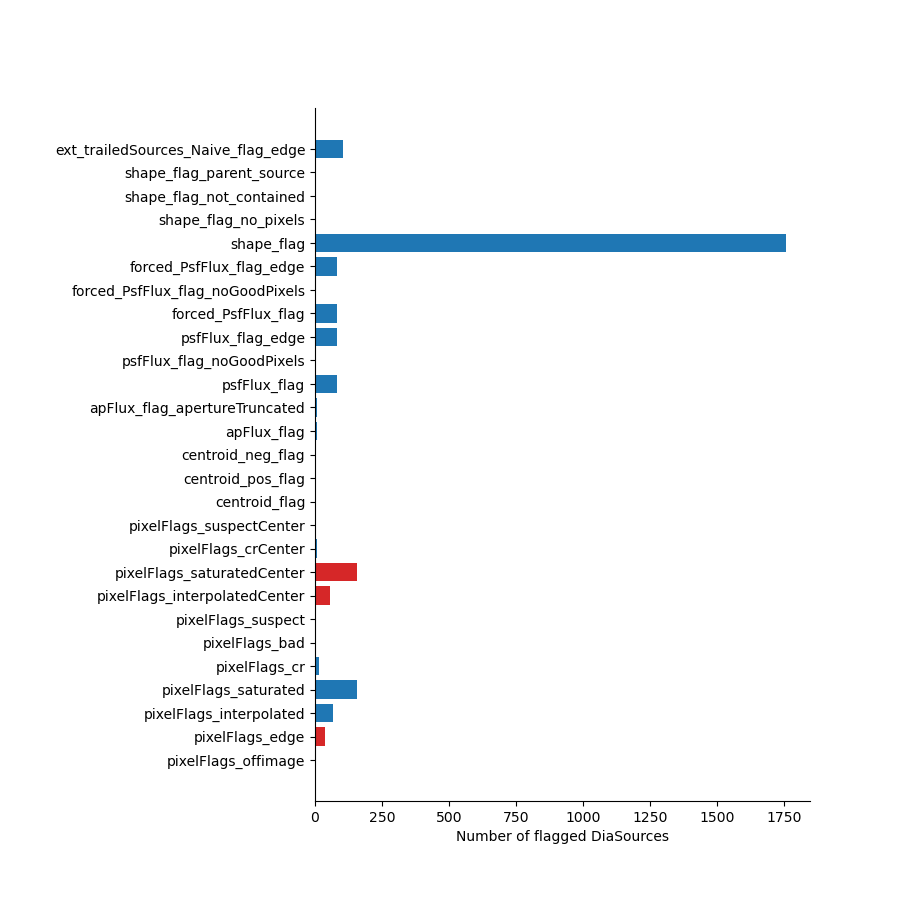

In [38]:
diaFlagHist(oneAssocDiaSrcTable)

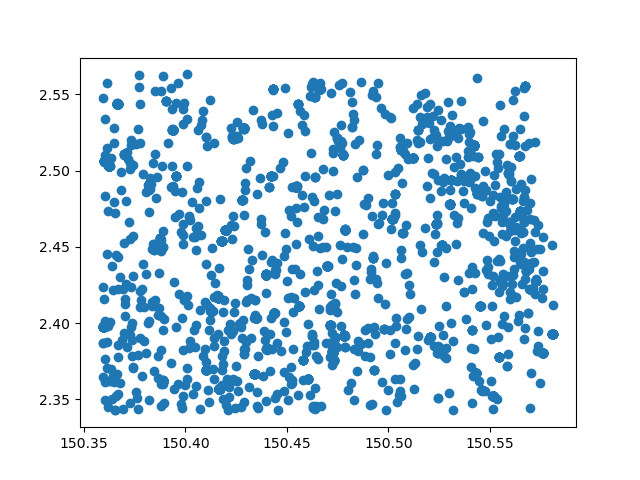

In [29]:
plt.figure()
plt.scatter(oneAssocDiaSrcTable.loc[noFlagFilter, 'ra'], oneAssocDiaSrcTable.loc[noFlagFilter, 'dec'])

## Count number of diaSources and how many visit+detector datasets went into one goodSeeingDiff_assocDiaSrcTable

In [62]:
dataIdList = []
for row in oneAssocDiaSrcTable['ccdVisitId'].values:
    dataIdList.append(packer.unpack(row))
    #detectorList.append(packer.unpack(row)['detector'])
dataIds_unique = set(dataIdList)
len(dataIds_unique)

331

In [152]:
def diaSourceCounter(butler, instrument, tract, patch,
                     badFlagList=['pixelFlags_edge', 'pixelFlags_bad', 'pixelFlags_suspect',
                                  'pixelFlags_interpolatedCenter', 'pixelFlags_saturatedCenter', ]):
    """Count the number of diaSources in a goodSeeingDiff_assocDiaSrcTable
    as well as the number of consituent visit+detector dataIds that went into it.
    Return the ratio, as a measure of "how many diaSources are there per visit+detector?"
    """
    df = butler.get('goodSeeingDiff_assocDiaSrcTable', tract=tract, patch=patch)
    nDiaSources = len(df)
    print(f'There are {nDiaSources} total diaSources')

    badFlags = [df[flag] for flag in badFlagList]
    flagFilter = functools.reduce(operator.or_, badFlags)
    noFlagFilter = ~flagFilter
    nDiaSources_good = len(df.loc[noFlagFilter])
    print(f'There are {nDiaSources_good} "good" diaSources')
    
    instrumentDataId = butler.registry.expandDataId(instrument=instrument)
    packer = Instrument.from_data_id(instrumentDataId).make_default_dimension_packer(data_id=instrumentDataId, is_exposure=False)
    
    visitDetectorList = []
    for row in df['ccdVisitId'].values:
        visitDetectorList.append(packer.unpack(row))
    visitDetectorList_unique = set(visitDetectorList)
    nVisitDetectors = len(visitDetectorList_unique)
    print(f'There are {nVisitDetectors} unique visit+detectors')

    diaSourcePerVisitDetector = nDiaSources_good / nVisitDetectors
    print(f'There are {nDiaSources_good / nVisitDetectors:.1f} "good" diaSources per dataId that went into this tract+patch')

    dfObj = butler.get('goodSeeingDiff_diaObjTable', tract=tract, patch=patch)
    nDiaObjects = len(dfObj)
    print(f'There are {nDiaObjects} total diaObjects')
    print(f'\t The diaObject with the most diaSources has {np.max(dfObj.nDiaSources)} diaSources')
    nDiaObjectsWithOneDiaSource = len(dfObj.loc[dfObj.nDiaSources==1])
    print(f'\t and {nDiaObjectsWithOneDiaSource} ({nDiaObjectsWithOneDiaSource/nDiaObjects*100:.1f}%) diaObjects have just 1 diaSource')

    plt.figure()
    plt.scatter(df['ra'], df['dec'], alpha=0.3, s=3)
    plt.scatter(df.loc[noFlagFilter, 'ra'], df.loc[noFlagFilter, 'dec'], alpha=0.3, s=3)
    plt.gca().invert_xaxis()
    plt.gca().set_xlabel('RA (deg)')
    plt.gca().set_ylabel('Dec (deg)')
    plt.title(f'Associated DiaSources in tract {tract}, patch {patch}')

There are 3549 total diaSources
There are 3362 "good" diaSources
There are 331 unique visit+detectors
There are 10.2 "good" diaSources per dataId that went into this tract+patch
There are 1212 total diaObjects
	 The diaObject with the most diaSources has 145 diaSources
	 and 1001 (82.6%) diaObjects have just 1 diaSource


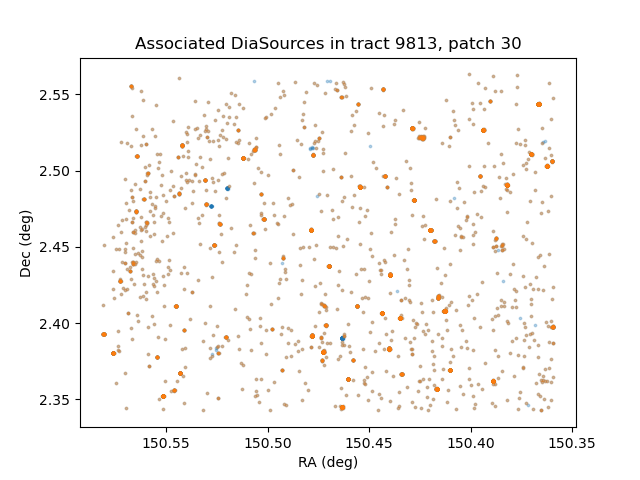

In [153]:
diaSourceCounter(butler, instrument, 9813, 30)

## Do this for more tract+patch combos

There are 197781 total diaSources
There are 173669 "good" diaSources
There are 1321 unique visit+detectors
There are 131.5 "good" diaSources per dataId that went into this tract+patch
There are 22258 total diaObjects
	 The diaObject with the most diaSources has 419 diaSources
	 and 13941 (62.6%) diaObjects have just 1 diaSource


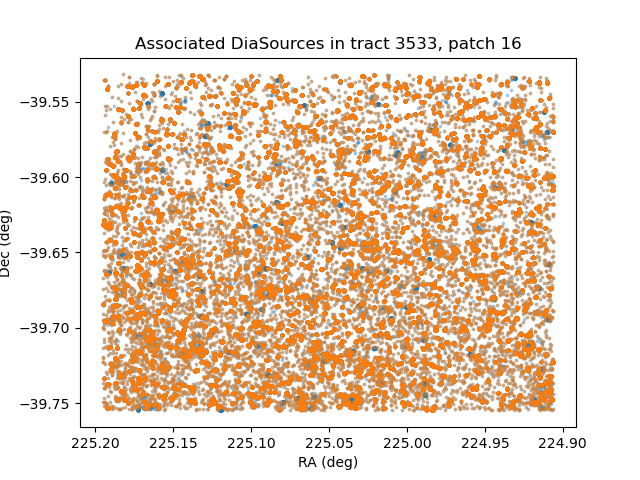

In [154]:
diaSourceCounter(butler, instrument, tract=3533, patch=16)

There are 6661 total diaSources
There are 6273 "good" diaSources
There are 81 unique visit+detectors
There are 77.4 "good" diaSources per dataId that went into this tract+patch
There are 1798 total diaObjects
	 The diaObject with the most diaSources has 42 diaSources
	 and 1038 (57.7%) diaObjects have just 1 diaSource


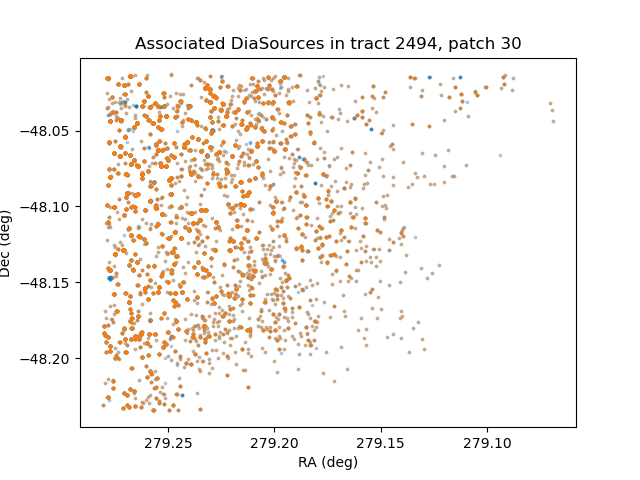

In [155]:
diaSourceCounter(butler, instrument, tract=2494, patch=30)

There are 26527 total diaSources
There are 24551 "good" diaSources
There are 508 unique visit+detectors
There are 48.3 "good" diaSources per dataId that went into this tract+patch
There are 4793 total diaObjects
	 The diaObject with the most diaSources has 169 diaSources
	 and 3031 (63.2%) diaObjects have just 1 diaSource


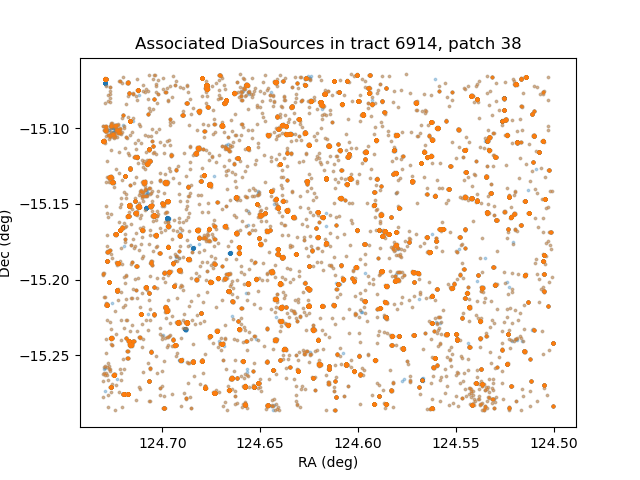

In [156]:
diaSourceCounter(butler, instrument, tract=6914, patch=38)

There are 9 total diaSources
There are 8 "good" diaSources
There are 1 unique visit+detectors
There are 8.0 "good" diaSources per dataId that went into this tract+patch
There are 9 total diaObjects
	 The diaObject with the most diaSources has 1 diaSources
	 and 9 (100.0%) diaObjects have just 1 diaSource


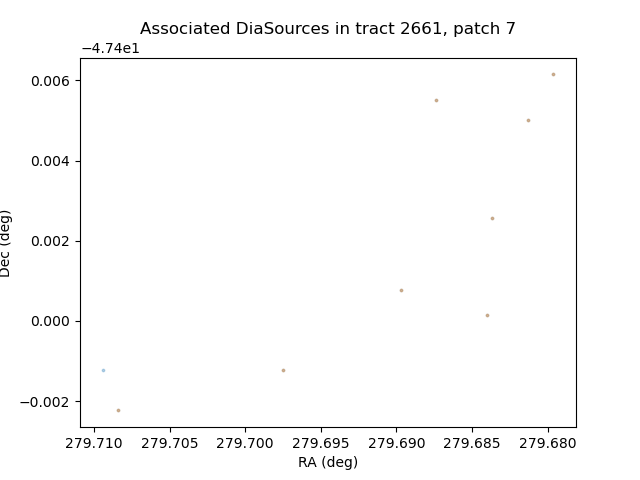

In [157]:
diaSourceCounter(butler, instrument, tract=2661, patch=7)